In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
import pandas as pd

In [2]:
def open_file(name):
    file = open(name, 'r', encoding='utf-8',
                errors='ignore')  # open the file.
    # creat a list that will be full filed with the file with a line as a list element.
    file_list = []
    for line in file:  # open a loop that cover the file.
        line = line.strip('\n')  # drop out all '\n' contained in every line.
        # change the spaces for a element of a list, ex: 'the energy is' --> ['the','energy','is'].
        line = line.split()
        if len(line) == 0:
            file_list.append(' ')
        else:
            file_list.append(line)  # add the line in the list file_list.
    file.close()  # close de file.
    return file_list



In [4]:
file = open_file('Examples/BN/bands_k/USPP/temp/bn.save/atomic_proj.xml')
def atomic_proj(file):
    def number_identify(string):
        number = ''
        number_list = list(map(lambda x:str(x),range(10)))
        for caracter in string:
            if (caracter in number_list) == True:
                number+=caracter
            elif caracter == '.':
                number+=caracter
            elif caracter == '+':
                old_number = number
                number = ''
        return float(number)

    for line in file:
        if line[0] == '<HEADER':
            n_band = int(number_identify(line[1]))
            n_spin = int(number_identify(line[3]))
            n_wfc = int(number_identify(line[4]))


    n = 0
    for i in range(len(file)):
            if file[i][0] == '<PROJS>':
                ct = i
            elif file[i][0] == '</PROJS>':
                    n = i-ct
            elif n != 0:
                break
    wfc_proj = {}
    for i in range(1,n_wfc+1):
        wfc_proj[i] = {}
        for j in range(1,n_band+1):
            wfc_proj[i][j] = []
    for wfc in range(1,n_wfc+1):
            for i in range(len(file)):
                if file[i][0] == '<ATOMIC_WFC':
                    #print(file[i])
                    index = int(number_identify(file[i][1]))
                    if index == wfc:
                        ct = 1
                        for j in range(i+1,i+1+n_band):
                            psi_real = float(file[j][0]);psi_imag = float(file[j][1])
                            psi_2 = pow(psi_real,2) +pow(psi_imag,2)
                            wfc_proj[wfc][ct].append(psi_2)
                            ct+=1          
    return [wfc_proj,n_band,n_spin,n_wfc]
proj,n_band,nspin,n_wfc = atomic_proj(file)
proj

{1: {1: [0.20728109277943285,
   0.20652076684937967,
   0.2042762142892579,
   0.20065155160594955,
   0.19580596723218607,
   0.18993456962946664,
   0.18324914773392412,
   0.17595972955351605,
   0.16826112272979057,
   0.16032424052196464,
   0.152291838387544,
   0.14427771116324922,
   0.13636881347525237,
   0.1286281440704929,
   0.12109860976469089,
   0.11380689597756737,
   0.10676641869625028,
   0.09998023988077202,
   0.09344383000093094,
   0.08714732578420478,
   0.08107608012461041,
   0.07521387182211892,
   0.06954241766970193,
   0.06404579627859268,
   0.05870952732486916,
   0.05352555061836016,
   0.04849409497772256,
   0.043629206707487676,
   0.03896159827398455,
   0.03454809604550933,
   0.03047156164893063,
   0.026843581857311997,
   0.023799688531872365,
   0.021485188843918635,
   0.020032204461124165,
   0.019536393628529762,
   0.01950790654496145,
   0.019422460155342772,
   0.01928044050111427,
   0.019082543668040085,
   0.018829447331059363,
   0.

In [28]:
file = open_file('Examples/BN/bands_k/USPP/bn.projwfc.out')
def States(file):
    states_line = []; atom_number = {};atom_number2 = {}
    for line in file:
        if line[0] == 'state':
            states_line.append(line)

    for line in states_line:
        atom_number2[line[5][1:]] = []
    for line in states_line:
        if (int(line[4])in atom_number2[line[5][1:]]) == False:
            atom_number2[line[5][1:]].append(int(line[4]))
        atom_number[int(line[4])] = line[5][1:]
    atom_orb = {}
    for key in atom_number.keys():
        marc_s = False; marc_p = False; marc_d = False
        for line in states_line:
            if int(line[4]) == key:
                if line[8] == '1':
                    if marc_s == False:
                        atom_orb[key] = {'s':[line[2][:-1]]}
                        marc_s = True
                    else:
                        atom_orb[key]['s'].append(line[2][:-1])
                elif line[8] == '2':
                    if marc_p == False:
                        atom_orb[key].update({'p':[line[2][:-1]]})
                        marc_p = True
                    else:
                        atom_orb[key]['p'].append(line[2][:-1])
                elif line[8] == '3':
                    if marc_d == False:
                        atom_orb[key].update({'d':[line[2][:-1]]})
                        marc_d = True
                    else:
                        atom_orb[key]['d'].append(line[2][:-1])
        
    return [atom_number2,atom_orb]
atom_number , atom_orb_number = States(file)
atom_orb_number

{1: {'s': ['1'], 'p': ['2', '3', '4']},
 2: {'s': ['5'], 'p': ['6', '7', '8']},
 3: {'s': ['9'], 'p': ['10', '11', '12']},
 4: {'s': ['13'], 'p': ['14', '15', '16']}}

In [176]:
atom_orb = {}
for key1 in atom_orb_number.keys():
    atom_orb[key1] = {}
    for key2 in atom_orb_number[key1]:
        atom_orb[key1][key2] = []
        p = 0;d = 0;marker_p = False
        for item in atom_orb_number[key1][key2]:
            if key2 == 's':
                atom_orb[key1][key2] = proj[int(item)]
            elif key2 == 'p':
                if marker_p == False:
                    atom_orb[key1][key2] = {}
                    marker_p = True
                if p == 0:
                    atom_orb[key1][key2]['px'] = proj[int(item)]
                elif p == 1:
                    atom_orb[key1][key2]['py'] = proj[int(item)]
                elif p == 2:
                    atom_orb[key1][key2]['pz'] = proj[int(item)]  
                p+=1
            elif key2 == 'd':
                if d == 0:
                    atom_orb[key1][key2] = {'px': proj[int(item)]}
                elif d == 1:
                    atom_orb[key1][key2].update({'py': proj[int(item)]})
                elif d == 2:
                    atom_orb[key1][key2].update({'pz': proj[int(item)]})
                d+=1  


for number_atom in atom_orb.keys():
    temp = {}
    for i in range(1,n_band+1):    
        marker = False
        for key in atom_orb[number_atom]['p'].keys():
            if marker == False:
                temp[i] = np.array(atom_orb[number_atom]['p'][key][i])
                marker = True
            else:
                temp[i] = temp[i] + np.array(atom_orb[number_atom]['p'][key][i])
    atom_orb[number_atom]['p']['tot'] = temp  

In [173]:
atom_proj.keys()

dict_keys(['B', 'N'])

In [187]:
atom_proj = {}
for atom in atom_number.keys():
    marker1 = False; j=1; tot = {}
    temp = {}
    for i in atom_number[atom]:
        if marker1 == False:
            atom_proj[atom] = {}
            marker1 = True
        atom_proj[atom][str(j)] = atom_orb[i]
        j+=1
    
atom_proj
for atom in atom_proj.keys():
    temp = {}; marker = False
    for i in range(1,n_band+1):
        for key1 in atom_proj[atom].keys():
            for key2 in atom_proj[atom][key1].keys():
                if key2 == 's':
                    if marker == False:
                        temp[i] = np.array(atom_proj[atom][key1][key2][i])
                        marker = True
                    print(atom_proj[atom][key1][key2][i])
                print(key2)
    atom_proj[atom] = temp

[0.20728109277943285, 0.20652076684937967, 0.2042762142892579, 0.20065155160594955, 0.19580596723218607, 0.18993456962946664, 0.18324914773392412, 0.17595972955351605, 0.16826112272979057, 0.16032424052196464, 0.152291838387544, 0.14427771116324922, 0.13636881347525237, 0.1286281440704929, 0.12109860976469089, 0.11380689597756737, 0.10676641869625028, 0.09998023988077202, 0.09344383000093094, 0.08714732578420478, 0.08107608012461041, 0.07521387182211892, 0.06954241766970193, 0.06404579627859268, 0.05870952732486916, 0.05352555061836016, 0.04849409497772256, 0.043629206707487676, 0.03896159827398455, 0.03454809604550933, 0.03047156164893063, 0.026843581857311997, 0.023799688531872365, 0.021485188843918635, 0.020032204461124165, 0.019536393628529762, 0.01950790654496145, 0.019422460155342772, 0.01928044050111427, 0.019082543668040085, 0.018829447331059363, 0.018522220311578776, 0.018161968215794893, 0.017750434340459826, 0.017289068433575666, 0.016779175377434632, 0.01622388694265097, 0.

In [178]:
atom_proj['B']

{'1': {'s': {1: [0.20728109277943285,
    0.20652076684937967,
    0.2042762142892579,
    0.20065155160594955,
    0.19580596723218607,
    0.18993456962946664,
    0.18324914773392412,
    0.17595972955351605,
    0.16826112272979057,
    0.16032424052196464,
    0.152291838387544,
    0.14427771116324922,
    0.13636881347525237,
    0.1286281440704929,
    0.12109860976469089,
    0.11380689597756737,
    0.10676641869625028,
    0.09998023988077202,
    0.09344383000093094,
    0.08714732578420478,
    0.08107608012461041,
    0.07521387182211892,
    0.06954241766970193,
    0.06404579627859268,
    0.05870952732486916,
    0.05352555061836016,
    0.04849409497772256,
    0.043629206707487676,
    0.03896159827398455,
    0.03454809604550933,
    0.03047156164893063,
    0.026843581857311997,
    0.023799688531872365,
    0.021485188843918635,
    0.020032204461124165,
    0.019536393628529762,
    0.01950790654496145,
    0.019422460155342772,
    0.01928044050111427,
    0.019

In [8]:
file = open_file('Examples/BN/bands_k/USPP/bn.bands.out')
def band_structure_from_bandsout(file):
    n_band = 0
    for line in file:
        if len(line)>=3:
            if line[2] == 'Kohn-Sham':
                n_band = int(line[4])
    bands = {}
    for e in range(1,n_band+1):
        bands[e] = []
    k_value = [];k_tol = 0
    for i in range(len(file)):
        if len(file[i])>=1:
            if file[i][0] == 'k':
                line = file[i]
                if len(k_value)>=1:
                    kx = float(line[2]); ky = float(line[3]); kz = float(line[4])
                    k_mod = np.sqrt((kx-kx_old)**2+(ky-ky_old)**2+(kz_old**2))
                    k_tol+=k_mod
                    k_value.append(round(k_tol,4))
                    del(kx_old);del(ky_old);del(kz_old)
                    kx_old = kx; ky_old = ky; kz_old = kz
                else:
                    kx = float(line[2]); ky = float(line[3]); kz = float(line[4])
                    k_mod = np.sqrt(kx**2+ky**2+kz**2)
                    k_tol+=k_mod
                    k_value.append(round(k_tol,4))
                    kx_old = kx; ky_old = ky; kz_old = kz

                bands_line = []
                for k in range(i+1,i+len(file)):
                    if len(file[k]) >=1: 
                        if file[k][0] == 'k' or file[k][0] == 'Writing':
                            break
                        else:
                            if file[k][0] != ' ':
                                for item in file[k]:
                                    bands_line.append(float(item))
                for j in range(n_band):
                    bands[j+1].append(bands_line[j])
    df = pd.DataFrame({'k':k_value})
    for e in range(1,n_band+1):
        df[str(e)]= bands[e] 
    return df
bands = band_structure_from_bandsout(file)

In [6]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')
def band_projected(axs,x,x_interp,E,projection,cmap):
    for i in range(len(E)):
        y_int = E[i]
        #z_int = np.array(band_proj[i]/band_proj[i].sum())
        z_int = projection[i+1]
        f = interpolate.interp1d(x_interp, y_int)
        g = interpolate.interp1d(x_interp, z_int)
        y = f(x)
        z = g(x)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0,1)
        #norm = plt.Normalize(0, z.max())
        #norm = plt.Normalize(mini,maxi)
        lc = LineCollection(segments, cmap=cmap, norm=norm) #cmap='viridis'
        lc.set_array(z)
        lc.set_linewidth(2)
        line = axs.add_collection(lc)
    #axs.set_ylim(y.min(), y.max())
    axs.set_xlim(x.min(),x.max())
    axs.set_facecolor('grey')
    plt.colorbar(line,ax =axs)
    return axs   

def band_projected_indi(axs,x,x_interp,E,projection,cmap):

        y_int = E
        #z_int = np.array(band_proj[i]/band_proj[i].sum())
        z_int = projection
        f = interpolate.interp1d(x_interp, y_int)
        g = interpolate.interp1d(x_interp, z_int)
        y = f(x)
        z = g(x)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(0,1)
        #norm = plt.Normalize(0, z.max())
        #norm = plt.Normalize(mini,maxi)
        lc = LineCollection(segments, cmap=cmap, norm=norm) #cmap='viridis'
        lc.set_array(z)
        lc.set_linewidth(2)
        line = axs.add_collection(lc)
        #axs.set_ylim(y.min(), y.max())
        axs.set_xlim(x.min(),x.max())
        axs.set_facecolor('grey')
        #plt.colorbar(line,ax =axs)
        return axs    

(-20, 20)

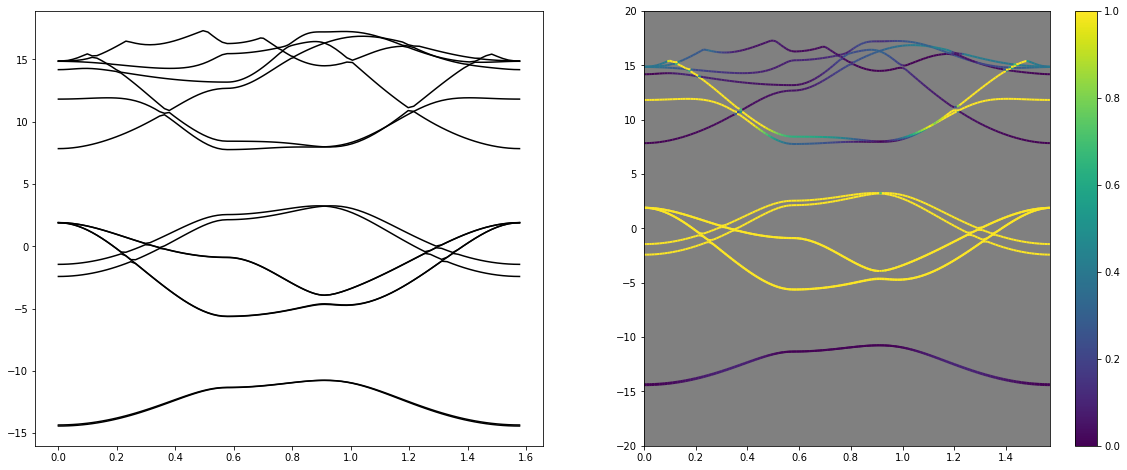

In [182]:
fig, figura = plt.subplots(1,2,figsize = (20,8))
bands_tot = [ ]
for j in range(1,n_band+1):
    figura[0].plot(bands['k'],bands[str(j)],c = 'black')
    bands_tot.append(bands[str(j)])
k = np.arange(0,bands['k'].max(),0.01)


#band_projected(figura[1],k,bands['k'],bands_tot,atom_orb[3]['p']['tot'],'viridis')
band_projected(figura[1],k,bands['k'],bands_tot,atom_proj['B']['tot'],'viridis')
figura[1].set_ylim(-20,20)

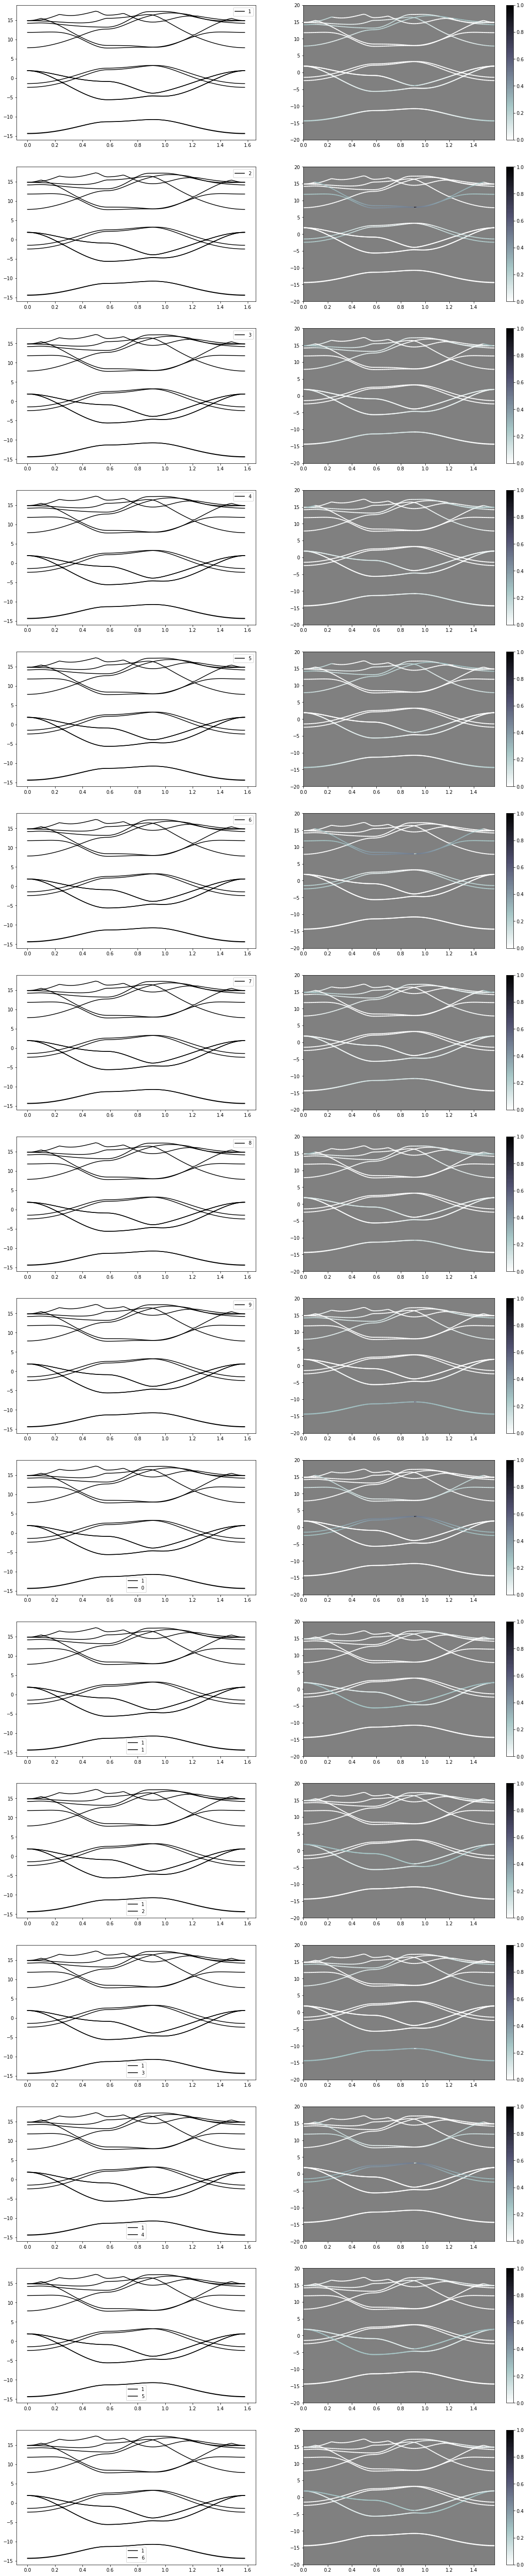

In [7]:
fig, figura = plt.subplots(n_wfc,2,figsize = (20,100))
for i in range(n_wfc):
    bands_tot = [ ]
    for j in range(1,n_band+1):
        figura[i][0].plot(bands['k'],bands[str(j)],c = 'black')
        bands_tot.append(bands[str(j)])
    k = np.arange(0,bands['k'].max(),0.01)
    figura[i][0].legend(str(i+1))  

    band_projected(figura[i][1],k,bands['k'],bands_tot,proj[i+1],'bone_r')
    figura[i][1].set_ylim(-20,20)